# **Thresholding and Morphological Operations Using Python (cv2)**
---

## **Overview**
This report covers thresholding techniques, including Otsu’s method for automated threshold selection, and morphological operations like erosion, dilation, opening, and closing. These techniques are essential in removing noise and enhancing features for image processing tasks.

## **1. Importing Required Libraries**
- OpenCV (`cv2`): A widely-used library for computer vision, used here for denoising, blurring, and edge detection techniques.
- NumPy (`np`): Provides array support, used for kernel manipulation and custom filter creation.
- Matplotlib (`plt`): Used for displaying images in a notebook or interactive Python environment.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **2. Loading and Displaying the Grayscale Image**
- Loads an image in grayscale, simplifying pixel data to intensity values ranging from 0 to 255. Using `plt.hist()`, the histogram plots pixel intensity distribution across the grayscale range, with 100 bins providing a detailed view.

  - `cv2.imread(filepath, flag=0)`: Loads the image as a grayscale (single-channel) image.
  - `plt.imshow(img, cmap="gray")`: Displays the grayscale image using a colormap that shows varying intensities.
  - `plt.hist(img.flat, bins=100, range=(0, 255))`: Flattens the image array into a 1D format to plot a histogram across the full intensity range.

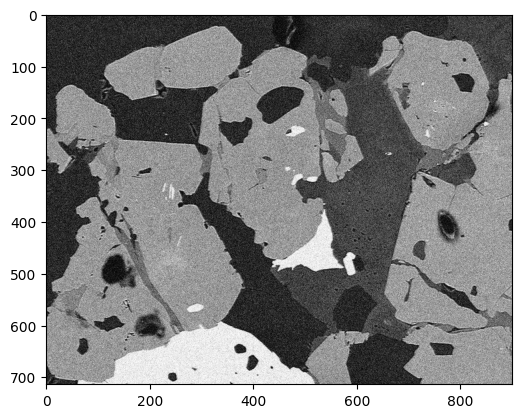

In [2]:
img = cv2.imread("/content/image.jpg", 0)
plt.imshow(img, cmap="gray");

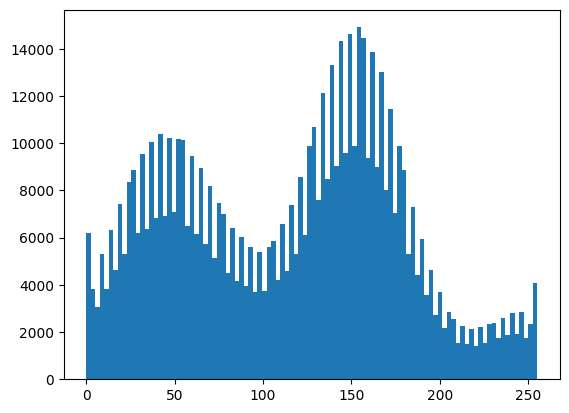

In [3]:
plt.hist(img.flat, bins=100, range=(0, 255));

## **3. Otsu’s Thresholding for Binary Segmentation**
- Otsu’s method automatically determines an optimal threshold value for segmentation by analyzing the grayscale histogram. Here, the thresholded binary image thresh segments pixels below the threshold as background (0) and above as foreground (255).

  - `cv2.threshold(src, thresh, maxval, type)`: Uses Otsu’s method with cv2.THRESH_BINARY + cv2.THRESH_OTSU, which automatically finds the best threshold and applies binary segmentation.
  - `val`: The threshold value calculated by Otsu’s method, printed to verify the computed value.

OTSU threshold value: 107.0



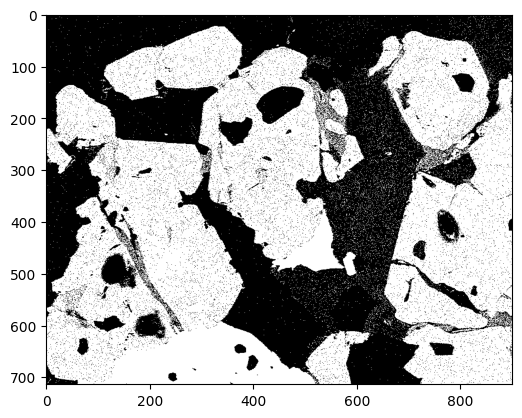

In [4]:
val, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"OTSU threshold value: {val}\n")
plt.imshow(thresh, cmap="gray");

## **4. Morphological Erosion**
- Erosion reduces the size of white regions in the binary image thresh, removing smaller structures by sliding a 3x3 kernel across the image. The effect depends on the kernel size and the number of iterations applied.

  - `cv2.erode(src, kernel, iterations)`: Reduces white pixel areas by considering neighboring pixel values.
  - `np.ones((3, 3), np.uint8)`: Creates a 3x3 square structuring element to define the erosion pattern.
  - `iterations=1`: Specifies a single pass of erosion over the image.

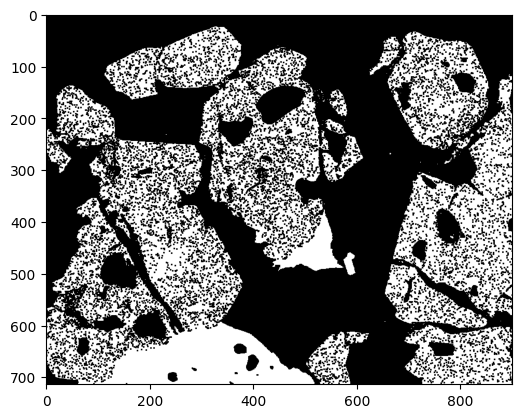

In [6]:
kernel = np.ones((3, 3), np.uint8)
eroded_img = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(eroded_img, cmap="gray");

## **5. Morphological Dilation**
- Dilation expands white regions in eroded_img, adding pixels around the structures. This counteracts erosion by restoring or connecting separated regions.

  - `cv2.dilate(src, kernel, iterations)`: Expands areas by applying the kernel to white pixels and their neighbors.
  - `iterations=1`: Runs the dilation operation once.

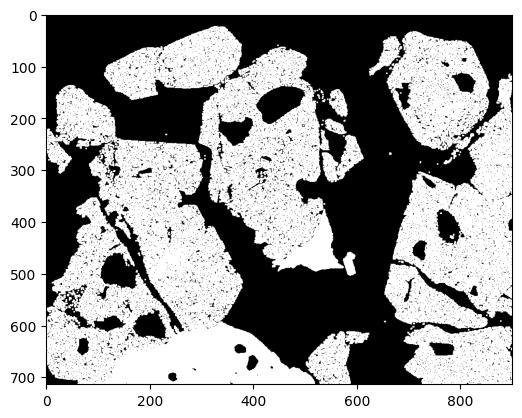

In [9]:
dilated_img = cv2.dilate(eroded_img, kernel, iterations=1)
plt.imshow(dilated_img, cmap="gray");

## **6. Morphological Opening and Closing**
- Opening first applies erosion, then dilation. This sequence removes noise and smaller objects while preserving larger structures. Closing reverses the order (dilation then erosion), filling gaps within larger shapes.

  - `cv2.morphologyEx(src, op, kernel)`: Applies the specified morphological operation (`cv2.MORPH_OPEN` or `cv2.MORPH_CLOSE`) with the given kernel.
  - `cv2.MORPH_OPEN`: Removes noise by eliminating small white regions.
  - `cv2.MORPH_CLOSE`: Closes small holes or gaps in larger regions.

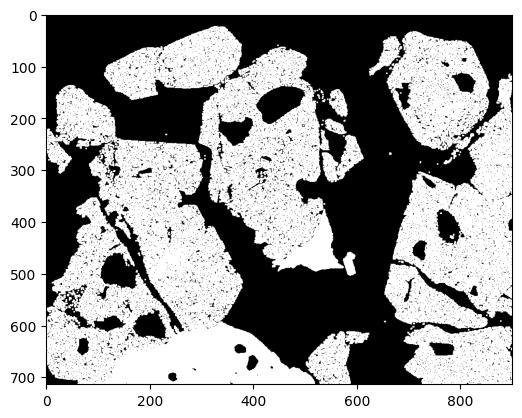

In [12]:
opening_img = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening_img, cmap="gray");

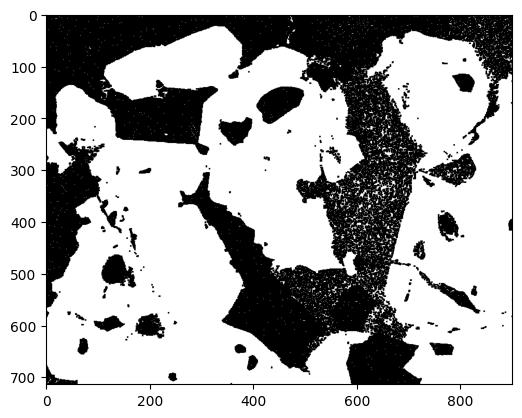

In [13]:
closing_img = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing_img, cmap="gray");

## **7. Top-Hat and Black-Hat Transformations**
- The Top-Hat transformation (`cv2.MORPH_TOPHAT`) highlights bright regions that differ from their surroundings, whereas the Black-Hat transformation (`cv2.MORPH_BLACKHAT`) emphasizes dark regions against a light background.

  - `cv2.MORPH_TOPHAT`: Detects bright areas smaller than the structuring element size.
  - `cv2.MORPH_BLACKHAT`: Reveals dark areas against a bright background.

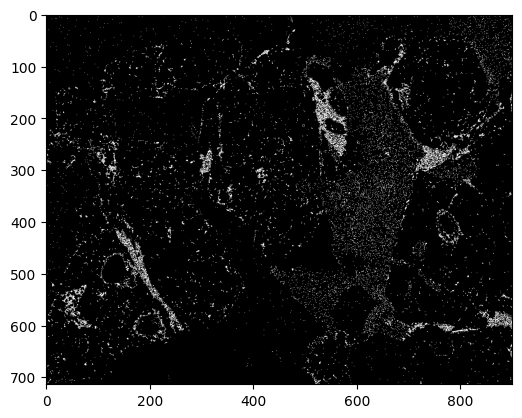

In [14]:
top_hat_img = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
plt.imshow(top_hat_img, cmap="gray");

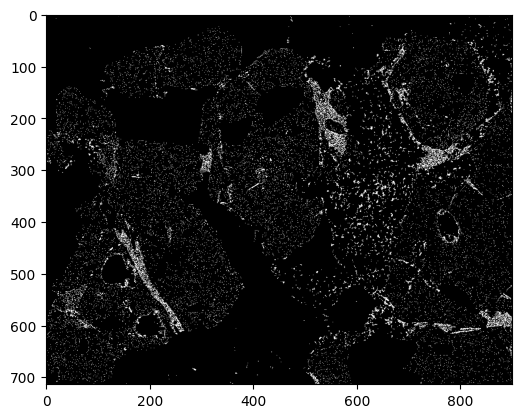

In [15]:
black_hat_img = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(black_hat_img, cmap="gray");

## **8. Image Denoising Using Median Filtering**
- The median filter reduces noise in img by replacing each pixel with the median value of neighboring pixels in a 3x3 area, preserving edges.

  - `cv2.medianBlur(src, ksize)`: Applies a median filter with a kernel size of 3.

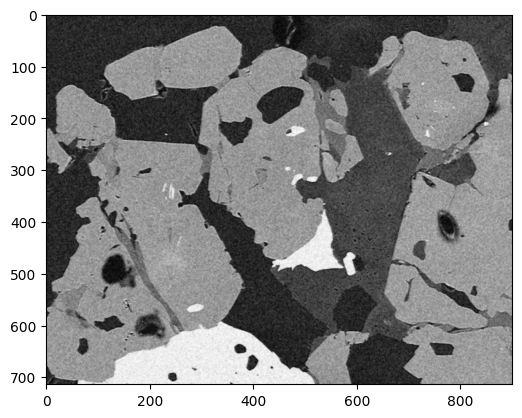

In [16]:
denoised_img = cv2.medianBlur(img, 3)
plt.imshow(denoised_img, cmap="gray");

## **9. Thresholding Post-Denoising Using Otsu’s Method**
- After denoising, Otsu’s method is reapplied to further refine segmentation by recalculating an optimal threshold for the denoised image, yielding a cleaner binary result.

  - `cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)`: Re-applies Otsu’s thresholding on the denoised image for improved binary segmentation.

OTSU threshold value: 105.0



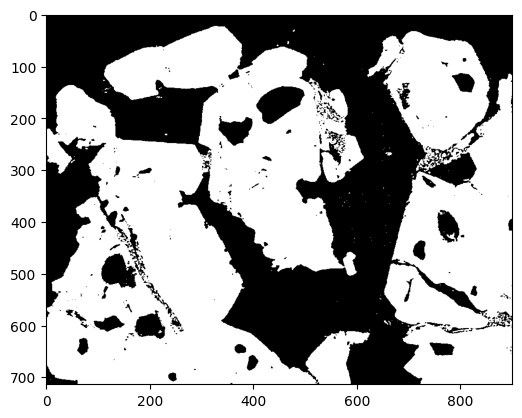

In [17]:
val2, thresh2 = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"OTSU threshold value: {val2}\n")
plt.imshow(thresh2, cmap="gray");